In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import statistics
import scipy.stats as stats
import math
import re

In [180]:
#origrnally data set size is 1 lac 68 thousand rows but we took sample of 49000

In [181]:
data =  pd.read_csv('zameen_data.csv')    

In [182]:
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,agent
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,NaN,NaN
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,NaN,NaN
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,NaN,NaN
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,NaN,NaN
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


In [183]:
data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,4.899900e+04,48999.000000,4.899900e+04,48999.000000,48999.000000,48999.000000,48999.000000
mean,1.271987e+07,4315.810302,1.883682e+07,29.919880,71.240346,3.217188,3.331333
std,2.249494e+06,3717.994892,3.812644e+07,3.847691,3.135906,2.222017,2.029215
min,8.657500e+04,1.000000,1.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.151477e+07,1033.000000,2.500000e+05,24.934628,67.115135,2.000000,2.000000
50%,1.330920e+07,3278.000000,8.200000e+06,31.465275,73.059892,3.000000,3.000000
75%,1.450427e+07,7185.000000,2.000000e+07,33.561526,73.209365,5.000000,5.000000
max,1.533518e+07,13971.000000,1.270000e+09,73.184088,80.161430,11.000000,18.000000


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48999 entries, 0 to 48998
Data columns (total 15 columns):
property_id      48999 non-null int64
location_id      48999 non-null int64
property_type    48999 non-null object
price            48999 non-null int64
location         48999 non-null object
city             48999 non-null object
province_name    48999 non-null object
latitude         48999 non-null float64
longitude        48999 non-null float64
baths            48999 non-null int64
area             48999 non-null object
purpose          48999 non-null object
bedrooms         48999 non-null int64
agency           19496 non-null object
agent            19496 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 5.6+ MB


In [209]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

agency: 0.6021% missing values
agent: 0.6021% missing values


In [210]:
#check if there is any null value in the data 
data.isnull().sum()

property_id          0
location_id          0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
agency           29503
agent            29503
dtype: int64

In [211]:
# we can drop the these columns with the null values but let's see the correlation of all columns with the price

Text(0.5, 1, 'CORRELATION MATRIX')

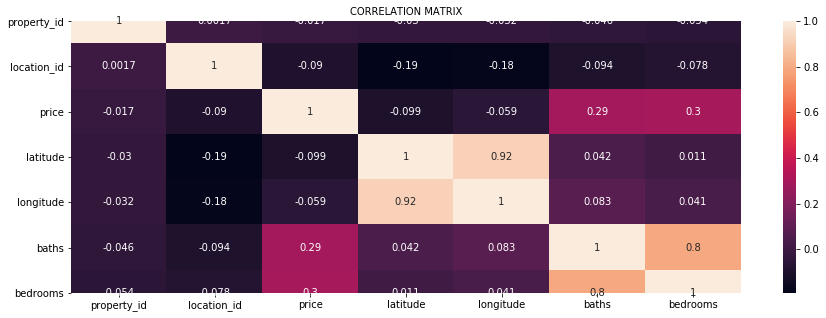

In [212]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(data.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=10)

In [213]:
# also remove property_id, location_id, latitude and longitude they tend show -ve correleation 

In [214]:
data = data.drop(['location_id','property_id','agency','agent','longitude','latitude'], axis='columns')

In [215]:
data.head()     

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,4 Marla,For Sale,2
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,5.6 Marla,For Sale,3
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,8 Marla,For Sale,5
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,2 Kanal,For Sale,4
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,8 Marla,For Sale,3


> lets find how many unique value are there in city, property_type, area, location and purpose

In [216]:
data['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [217]:
data['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [218]:
data['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

>Split the area into Marla and Kanal

In [219]:
#area_size = data['area'].str.split(expand=True)
#area_size.columns = ["area size","area type"]
#data = pd.concat([data, area_size], axis=1)

In [220]:
data['area size']= data['area size'].astype(float)

In [221]:
data['area size'].isnull().sum()

0

In [222]:
data.head()

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,area size,area type
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,4 Marla,For Sale,2,4.0,Marla
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,5.6 Marla,For Sale,3,5.6,Marla
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,8 Marla,For Sale,5,8.0,Marla
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,2 Kanal,For Sale,4,2.0,Kanal
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,8 Marla,For Sale,3,8.0,Marla


.

>change the area into normalized unit let's take square feet as standard unit for the area

In [223]:
data['area size']= data['area size'].astype(float)
data["area in sq_ft"] = 0

for i in range(len(data['area size'])):
    if(data['area type'][i] == 'Marla'):
        data['area in sq_ft'][i] = data['area size'][i]*272.25
    else:
        data['area in sq_ft'][i] = data['area size'][i]*5445 

C:\Users\Bilawal Aka Bilal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Bilawal Aka Bilal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [224]:
data.head()

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,area size,area type,area in sq_ft
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,4 Marla,For Sale,2,4.0,Marla,1089
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,5.6 Marla,For Sale,3,5.6,Marla,1524
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,8 Marla,For Sale,5,8.0,Marla,2178
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,2 Kanal,For Sale,4,2.0,Kanal,10890
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,8 Marla,For Sale,3,8.0,Marla,2178


In [225]:
# drop area type, area size and area as we have area in sq_ft as a new columms 

In [226]:
data = data.drop(['area','area size','area type'], axis='columns')

In [228]:
data.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,area in sq_ft
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,1524
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178


>Handling the Outliers in the data

> Finding total rows with 0 baths and 0 bedrooms (these rows shows the a pice of land,  we get to know about it while going through the description of the data)

In [229]:
((data.baths[data.baths == 0])& (data.bedrooms[data.bedrooms==0])).count()

8743

In [230]:
# there are 8734 plots (house not build yet)

> time to find the realtions between the columns

Text(0.5, 1.0, 'Bedrooms VS Price')

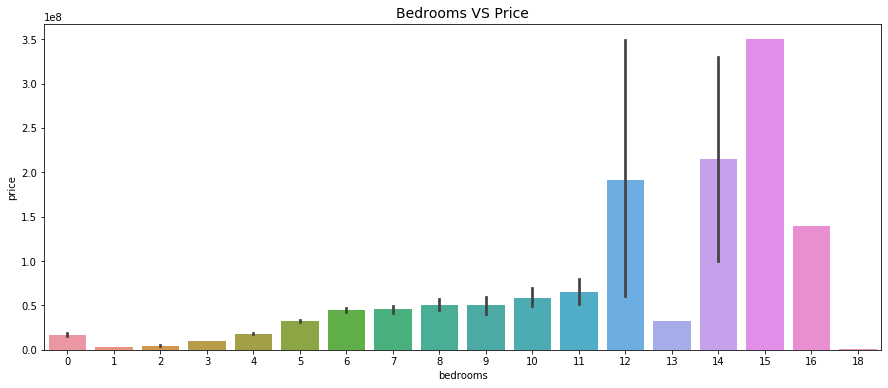

In [231]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x=data['bedrooms'], y=data['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

In [ ]:
# we will remove the bedrooms with 18 rooms as its price is almost 0

Text(0.5, 1.0, 'Bedrooms VS Area')

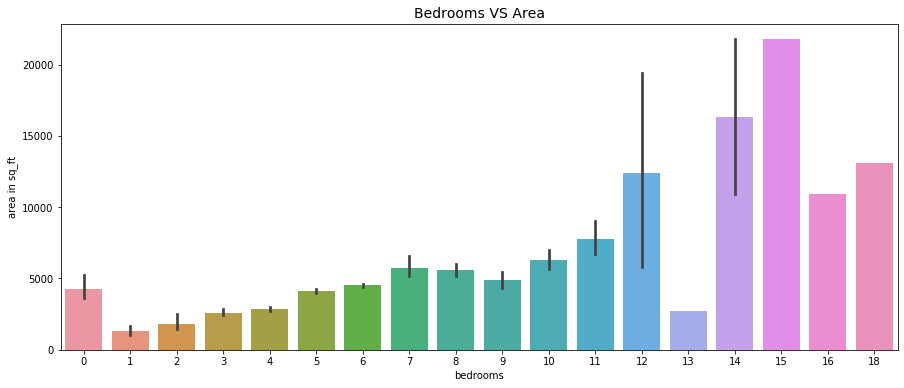

In [232]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['area in sq_ft'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Area', fontsize=14)

In [233]:
data['bedrooms'].replace(to_replace = 13, value = 4, inplace = True)

Text(0.5, 1.0, 'Bedrooms VS Price')

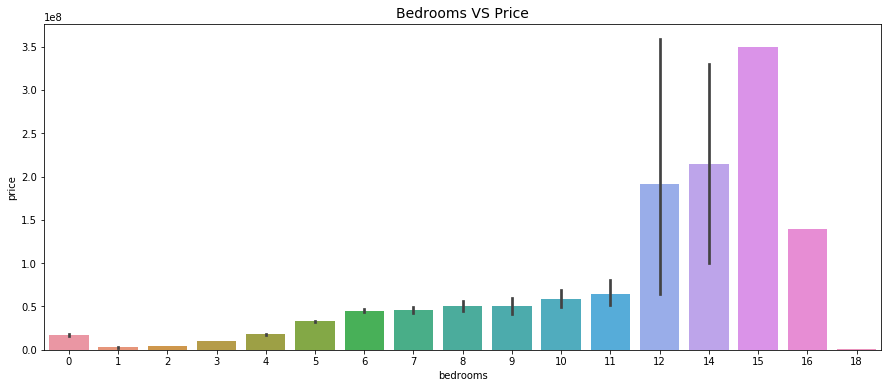

In [234]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Area')

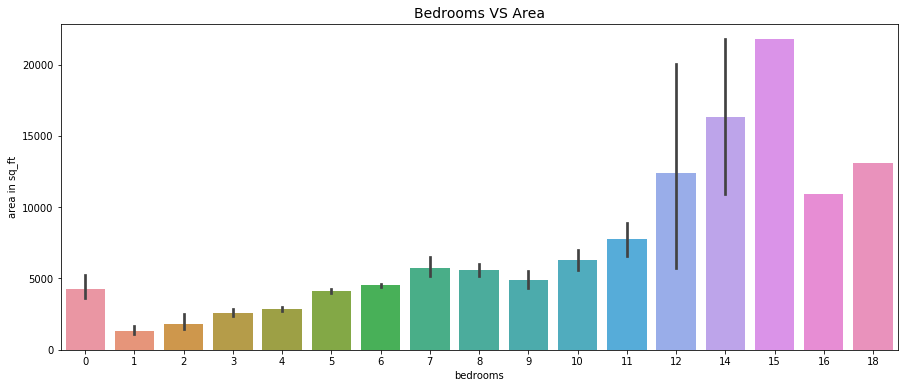

In [235]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['area in sq_ft'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Area', fontsize=14)

In [236]:
data.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,area in sq_ft
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,1524
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178


Text(0.5, 1.0, 'Baths VS Price')

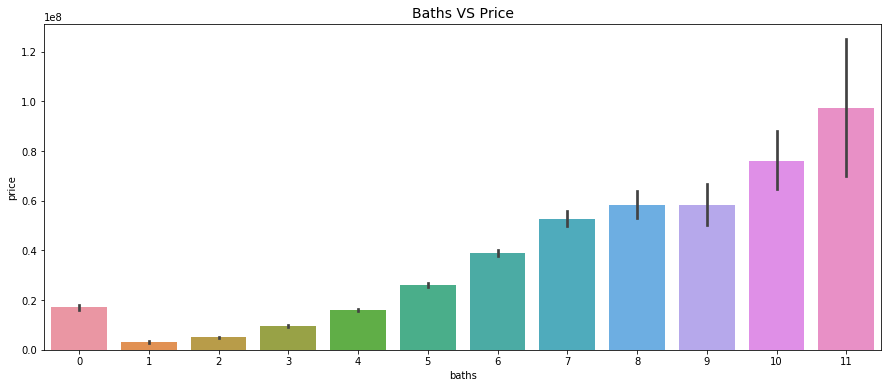

In [237]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['baths'], y=data['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Baths VS Price', fontsize=14)

Text(0.5, 1.0, 'Baths VS Area')

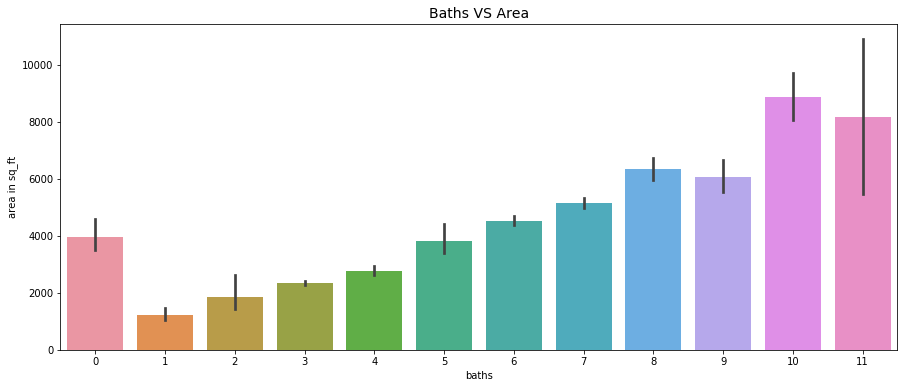

In [238]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['baths'], y=data['area in sq_ft'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Baths VS Area', fontsize=14)

>Relationship between cities and Price

In [239]:
data.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,area in sq_ft
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,1524
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178


In [246]:
city = data.groupby(['city']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
city

,len,min,max
city,,,
Faisalabad,2445,3000,300000000
Islamabad,11155,5000,850000000
Karachi,17407,4,700000000
Lahore,11379,1,1270000000
Rawalpindi,6613,1800,650000000


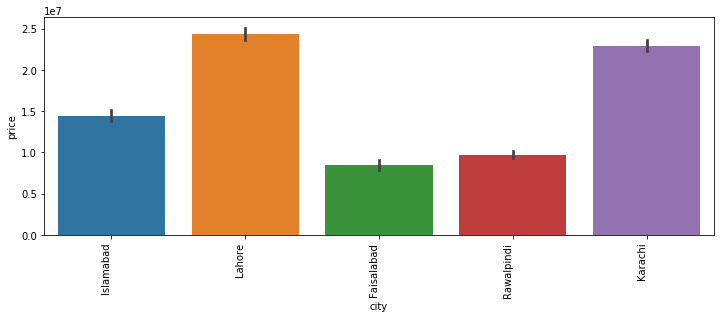

In [250]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x="city", y="price", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

# Data Preparation

In [184]:
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,agent
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,NaN,NaN
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,NaN,NaN
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,NaN,NaN
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,NaN,NaN
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


In [185]:
data.isnull().sum()

property_id          0
location_id          0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
agency           29503
agent            29503
dtype: int64

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48999 entries, 0 to 48998
Data columns (total 15 columns):
property_id      48999 non-null int64
location_id      48999 non-null int64
property_type    48999 non-null object
price            48999 non-null int64
location         48999 non-null object
city             48999 non-null object
province_name    48999 non-null object
latitude         48999 non-null float64
longitude        48999 non-null float64
baths            48999 non-null int64
area             48999 non-null object
purpose          48999 non-null object
bedrooms         48999 non-null int64
agency           19496 non-null object
agent            19496 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 5.6+ MB


In [187]:
data.corr()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
property_id,1.000000,0.001725,-0.016858,-0.029509,-0.031554,-0.045779,-0.054394
location_id,0.001725,1.000000,-0.089737,-0.192056,-0.180070,-0.094477,-0.077549
price,-0.016858,-0.089737,1.000000,-0.099044,-0.059439,0.288693,0.298141
latitude,-0.029509,-0.192056,-0.099044,1.000000,0.917832,0.042152,0.010618
longitude,-0.031554,-0.180070,-0.059439,0.917832,1.000000,0.082530,0.040681
baths,-0.045779,-0.094477,0.288693,0.042152,0.082530,1.000000,0.797747
bedrooms,-0.054394,-0.077549,0.298141,0.010618,0.040681,0.797747,1.000000


In [188]:
data['property_type'].value_counts()

House            30501
Flat             11647
Upper Portion     3653
Lower Portion     2443
Room               316
Farm House         260
Penthouse          179
Name: property_type, dtype: int64

In [189]:
data['purpose'].value_counts()

For Sale    35829
For Rent    13170
Name: purpose, dtype: int64

In [190]:
data['city'].value_counts()

Karachi       17407
Lahore        11379
Islamabad     11155
Rawalpindi     6613
Faisalabad     2445
Name: city, dtype: int64

In [191]:
area_size = data['area'].str.split(expand=True)
area_size.columns = ["area size","area type"]
data = pd.concat([data, area_size], axis=1)

In [192]:
data['area size']= data['area size'].astype(float)

In [193]:
data.reset_index(inplace=True, drop=True)

In [194]:
data["area in sq_ft"] = 0

for i in range(len(data['area size'])):
    if(data['area type'][i] == 'Marla'):
        data['area in sq_ft'][i] = data['area size'][i]*272.25
    else:
        data['area in sq_ft'][i] = data['area size'][i]*5445 

C:\Users\Bilawal Aka Bilal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Bilawal Aka Bilal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [195]:
data.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,agent,area size,area type,area in sq_ft
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,NaN,NaN,4.0,Marla,1089
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,NaN,NaN,5.6,Marla,1524
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,NaN,NaN,8.0,Marla,2178
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,NaN,NaN,2.0,Kanal,10890
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla,2178


In [196]:
# Dropping the columns 

In [197]:
data = data.drop(['latitude','longitude','city','province_name','agency','agent','property_id','location_id','area type','area size','area'], axis='columns')

In [198]:
data.head()

,property_type,price,location,baths,purpose,bedrooms,area in sq_ft
0,Flat,10000000,G-10,2,For Sale,2,1089
1,Flat,6900000,E-11,3,For Sale,3,1524
2,House,16500000,G-15,6,For Sale,5,2178
3,House,43500000,Bani Gala,4,For Sale,4,10890
4,House,7000000,DHA Defence,3,For Sale,3,2178


In [199]:
data = pd.get_dummies(data, columns = ['property_type','location','purpose'], drop_first=True)

In [200]:
data.shape   #columns increased from 7 to 1340 

(48999, 1340)

In [201]:
data.head()

,price,baths,bedrooms,area in sq_ft,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,...,location_Zaraj Housing Scheme,location_Zeeshan Colony,location_Zero Point,location_Zia Colony,location_Zone 5,location_Zubaida Park,location_Zubair Colony,location_Zulfiqar Colony,location_circular road,purpose_For Sale
0,10000000,2,2,1089,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6900000,3,3,1524,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16500000,6,5,2178,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43500000,4,4,10890,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7000000,3,3,2178,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Handling with the Outliers

In [202]:
data.head()

,price,baths,bedrooms,area in sq_ft,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,...,location_Zaraj Housing Scheme,location_Zeeshan Colony,location_Zero Point,location_Zia Colony,location_Zone 5,location_Zubaida Park,location_Zubair Colony,location_Zulfiqar Colony,location_circular road,purpose_For Sale
0,10000000,2,2,1089,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6900000,3,3,1524,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16500000,6,5,2178,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43500000,4,4,10890,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7000000,3,3,2178,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


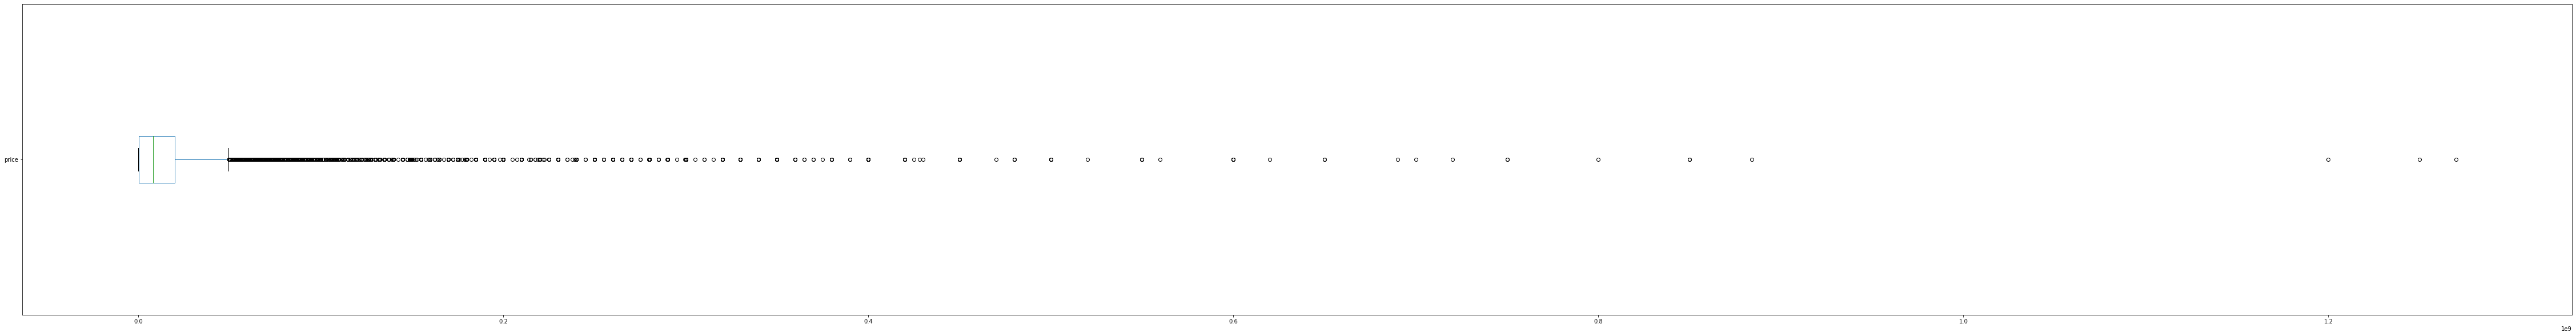

In [203]:
data["price"].plot.box(vert = 0, figsize=(80,10))

In [204]:
# prices greater than 50 crore are outliers 

In [221]:
data[data['price']>400000000].shape

(45, 1340)

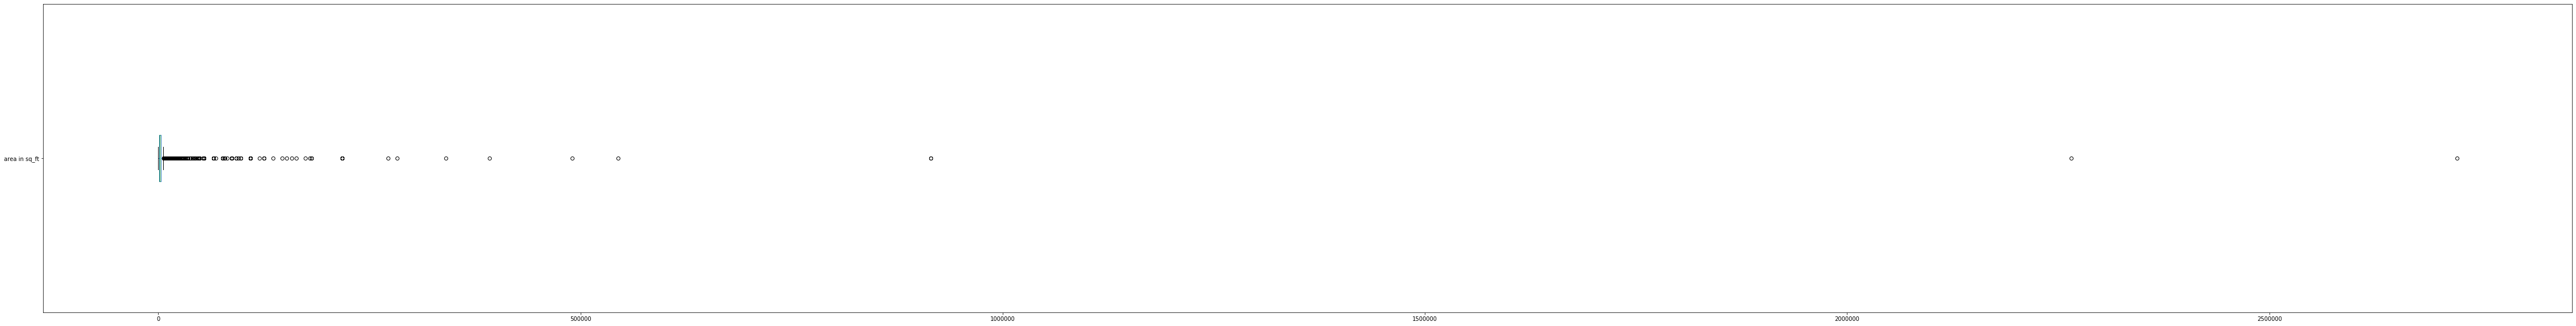

In [154]:
data["area in sq_ft"].plot.box(vert = 0, figsize=(80,10))

In [171]:
data[data["area in sq_ft"]>50000].shape

(102, 7)

In [ ]:
# properties having area more than 50 thousand sq_ft are outliers

In [ ]:
# handle dummy variables

In [206]:
data.dtypes

price                       int64
baths                       int64
bedrooms                    int64
area in sq_ft               int64
property_type_Flat          uint8
                            ...  
location_Zubaida Park       uint8
location_Zubair Colony      uint8
location_Zulfiqar Colony    uint8
location_circular road      uint8
purpose_For Sale            uint8
Length: 1340, dtype: object